In [1]:
# make graphs interactive
%matplotlib notebook 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.cm as cm

#import seaborn as sns
import json
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr


In [3]:
# Load a CSV file into a pandas DataFrame
data = pd.read_csv('mint_cleaned_selected_DMK1G.csv')


In [4]:
panel_labels = 'ABCDEFGHIJKLMONOPQRSTUVWXYZ'


In [5]:
panel_labels[0]

'A'

In [6]:
# Define the units for the paramters described in sel_data.

# The following units are used for more than one parameter:

lef_unit = r'($\mu mol$ $e^-$ $m^{-2} s^{-1})$'

par_unit = r'($\mu mol$ photons $m^{-2} s^{-1})$'
sqrt_par_unit = r'($\mu mol$ photons $m^{-2} s^{-1})^{0.5}$'

deltaA_unit = r'$(\Delta$ A X 1000)'
first_order_rate_unit = r'($s^{-1})$'


degreesC = r'$(^oC)$'

# Generate a dictionary to contain the units for the paramters described in sel_data.

units = { 'LEF (high-ambient)': lef_unit, 
           'NPQ (high-recovered)':'', 
           'NPQ (high-ambient)':'',
           'Leaf Temperature': degreesC,
           'Light Intensity (PAR)': par_unit,           
           'NPQ (ambient)':'',
           'NPQ (high)':'',
           'NPQ (recovery)':'',
           'Time of Day':'(h)',
           'Time': '(days)',
            "LEF (ambient)": lef_unit,
            "LEF (high)": lef_unit,
           'qL (ambient)': '',
            'qL (high)':'',
           'ECSt (ambient)': deltaA_unit,
           'ECSt (high)': deltaA_unit,
            'vH+':'a.u.',
           'Leaf Temperature Differential': degreesC,
             'Ambient Temperature': degreesC,
            'tod fract':'',
             'time stamp':'',
             'day number':'',
             'Relative Humidity': "%",
             'date-month/day/year':'',
             'time':'',
             'datetime':'',
             'DIRK810 (ambient)': deltaA_unit,
             'DIRK810 (high)': deltaA_unit,
             'gH+ (ambient)': first_order_rate_unit,
             'gH+ (high)': first_order_rate_unit
        }


In [7]:
aliases = {'ECSt (ambient)': 'ECSamb',
          'DIRK810 (high)': r'$P^+_{high}$',
          'DIRK810 (ambient)': r'$P^+_{amb}$',
          'DIRK810 (high-ambient)': r'$P^+_{high-amb}$',
          'NPQ (ambient)': r'$NPQ_{amb}$',
          'NPQ (high)': r'$NPQ_{high}$',
           'NPQ (high-ambient)': r'$NPQ_{high-amb}$',
           'NPQ (recovery)': r'$NPQ_{rec}$',
           'NPQ (ambient-recovery)': r'$NPQ_{amb-rec}$',
           'NPQ (high-recovery)': r'$NPQ_{high-rec}$',
          'LEF (ambient)': r'$LEF_{amb}$',
          'LEF (high)': r'$LEF_{high}$',
           'LEF (high-ambient)': r'$LEF_{high-amb}$',
          'qL (ambient)': r'$qL_{amb}$',
          'qL (high)': r'$qL_{high}$',
           'qL (high-ambient)': r'$qL_{high-amb}$',
          'ECSt (ambient)': r'$ECSt_{amb}$',
          'ECSt (high)': r'$ECSt_{high}$',
           'ECSt (high-ambient)': r'$ECSt_{high-amb}$',
            'gH+ (ambient)': r'$gH+_{amb}$',
          'gH+ (high)': r'$gH+_{high}$',
           'gH+ (high-ambient)': r'$gH+_{high-amb}$',
           'Leaf Temperature': r'$T_{leaf}$'
          } 


In [8]:
data['qL (high-ambient)'] = data['qL (high)'] - data['qL (ambient)'] 

In [9]:
plot_param_color={}

In [10]:
plot_param_color = {'LEF (ambient)':'blue', 'LEF (high)':'green'} 

In [11]:
data['DIRK810 (high-ambient)'] = data['DIRK810 (high)'] - data['DIRK810 (ambient)']

In [12]:
data['ECSt (high-ambient)'] = data['ECSt (high)'] - data['ECSt (ambient)']

In [13]:
data['NPQ (high-ambient)'] = data['NPQ (high)'] - data['NPQ (ambient)'] 

In [14]:
data['NPQ (high-recovery)'] = data['NPQ (high)'] - data['NPQ (recovery)'] 

In [15]:
data['NPQ (ambient-recovery)'] = data['NPQ (ambient)'] - data['NPQ (recovery)'] 

In [16]:
data.keys()

Index(['Unnamed: 0', 'LEF (high-ambient)', 'NPQ (high-recovered)',
       'NPQ (high-ambient)', 'Leaf Temperature', 'Light Intensity (PAR)',
       'LEF (high)', 'LEF (ambient)', 'Relative Chlorophyll', 'NPQ (ambient)',
       'NPQ (high)', 'NPQ (recovery)', 'Time of Day', 'Time', 'qL (ambient)',
       'qL (high)', 'ECSt (ambient)', 'ECSt (high)',
       'Leaf Temperature Differential', 'vH+ (ambient)', 'vH+ (high)',
       'tod fract', 'time stamp', 'day number', 'Ambient Temperature',
       'Relative Humidity', 'DIRK810 (ambient)', 'DIRK810 (high)',
       'gH+ (ambient)', 'gH+ (high)', 'Phi2 (ambient)', 'Phi2 (high)',
       'datum_id', 'date-month/day/year', 'time', 'datetime',
       'qL (high-ambient)', 'DIRK810 (high-ambient)', 'ECSt (high-ambient)',
       'NPQ (high-recovery)', 'NPQ (ambient-recovery)'],
      dtype='object')

In [17]:
for key in data.keys():
    if 'Phi' in key:
        print(key)

Phi2 (ambient)
Phi2 (high)


In [18]:
data['Phi2 (high-ambient)'] = data['Phi2 (high)'] - data['Phi2 (ambient)'] 

<IPython.core.display.Javascript object>


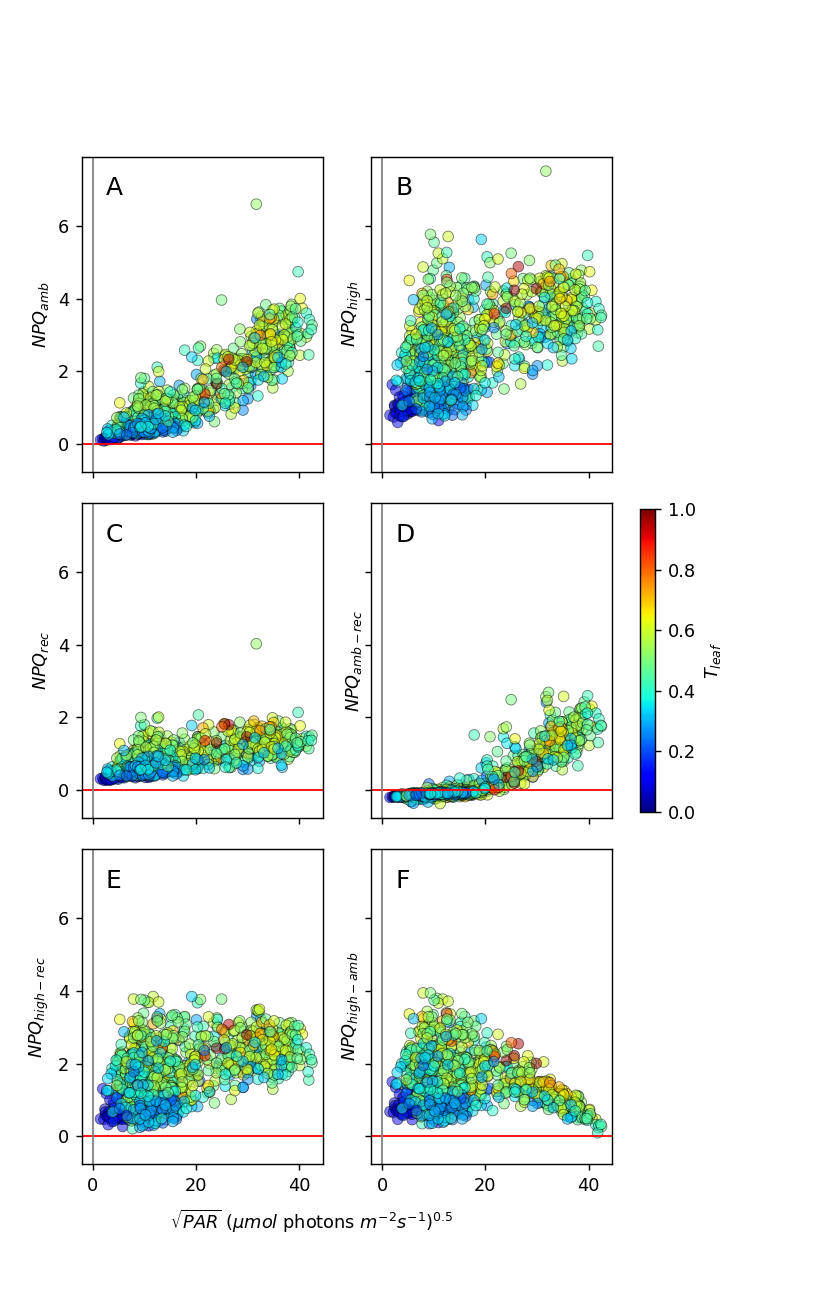

0 0 0
0 1 1
1 0 2
1 1 3
2 0 4
2 1 5


In [19]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'NPQ (ambient)', 'Leaf Temperature'],
       ['Light Intensity (PAR)', 'NPQ (high)','Leaf Temperature'],
       ['Light Intensity (PAR)', 'NPQ (recovery)', 'Leaf Temperature'],
       ['Light Intensity (PAR)', 'NPQ (ambient-recovery)', 'Leaf Temperature'],
       ['Light Intensity (PAR)', 'NPQ (high-recovery)', 'Leaf Temperature'],
       ['Light Intensity (PAR)', 'NPQ (high-ambient)', 'Leaf Temperature']]


fig, ax = plt.subplots(3,2, sharex=True, sharey = True, figsize = [5,8])

sel_data = data #[data['qL (high-ambient)']>0]

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):


        k = i*(ax.shape[0]-1) + j
        print(i,j,k)
        param = params[k]
        ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
                sel_data[param[1]],
                c=sel_data[param[2]],
                edgecolor='black',
                linewidth=.5,
                cmap=cm.jet,
                alpha=alpha,
                label=param[1]) 
        ax[i][j].axhline(y=0,linewidth=1, color='red')
        ax[i][j].axvline(x=0,linewidth=1, color='grey')
        #add panel labels (NOTE: letter  is set by: panel_labels[ax.shape[1]*i + j])
        ax[i][j].text(.1,.9, panel_labels[ax.shape[1]*i + j], 
                   horizontalalignment='left',
                   verticalalignment='center',
                   transform=ax[i][j].transAxes, fontsize = 14)
        ax[i][j].set_ylabel(aliases[param[1]])
    #colorbar()
    ax[i][j].set_xlabel('')
ax[2][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left')



ticklab = ax[2][0].xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()

ax[2][0].xaxis.set_label_coords(15, -0.1, transform = trans)

sm =  ScalarMappable(cmap=cm.jet)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax[:], shrink=.3)

cbar.ax.set_ylabel(aliases[param[2]], rotation=90)
plt.subplots_adjust(hspace=0.1, left = 0.1, right=0.75)


#plt.savefig("fig1-npq-TL-6panels.tiff", dpi=600, format="tiff")

plt.show()


<IPython.core.display.Javascript object>


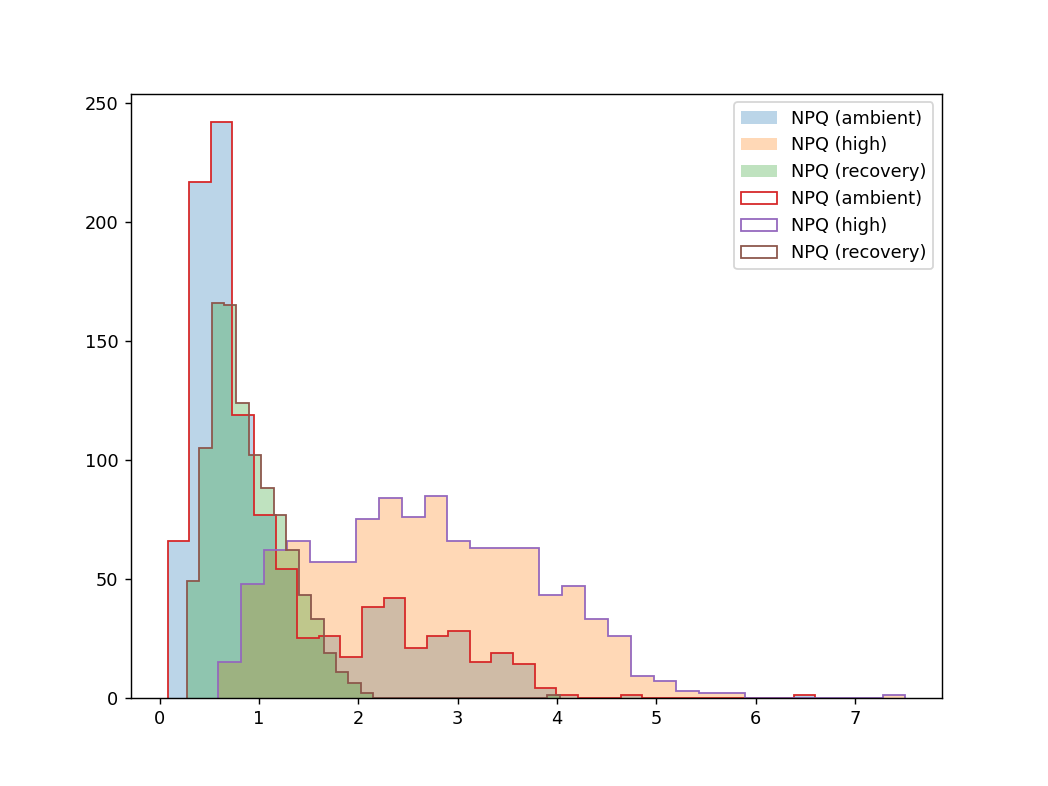

In [20]:
bins = 30
plt.figure()
params = ['NPQ (ambient)', 'NPQ (high)', 'NPQ (recovery)']
for param in params:
    plt.hist(sel_data[param], bins = bins, alpha = .3, label = param, histtype = 'stepfilled')
for param in params:
    plt.hist(sel_data[param], bins = bins, alpha = 1, label = param, histtype = 'step')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


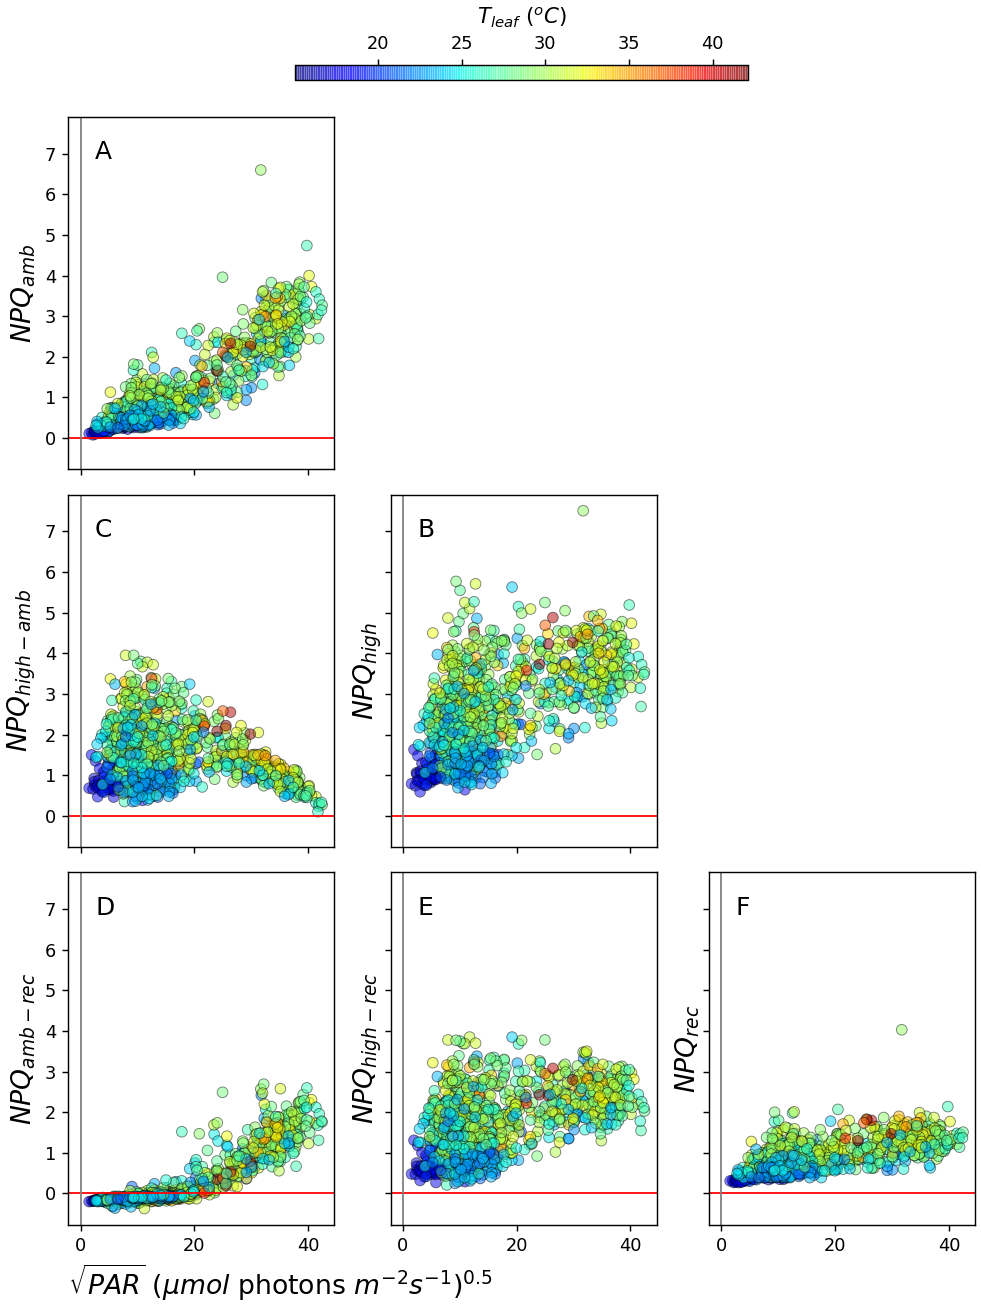

In [21]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'NPQ (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'NPQ (high)','Leaf Temperature', [1,1], 'B'],
       ['Light Intensity (PAR)', 'NPQ (recovery)', 'Leaf Temperature', [2,2], 'F'],
       ['Light Intensity (PAR)', 'NPQ (ambient-recovery)', 'Leaf Temperature', [2,0], 'D'],
       ['Light Intensity (PAR)', 'NPQ (high-recovery)', 'Leaf Temperature', [2,1], 'E'],
       ['Light Intensity (PAR)', 'NPQ (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(3,3, sharex=True, sharey = True, figsize = [6,8], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 14)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)

ax[2][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)

#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')


cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')

cbar.ax.set_title(aliases[param[2]] + ' ' + r'$(^oC)$')


#plt.savefig("fig-par-npq-TL.tiff", dpi=600, format="tiff")
plt.show()


<IPython.core.display.Javascript object>


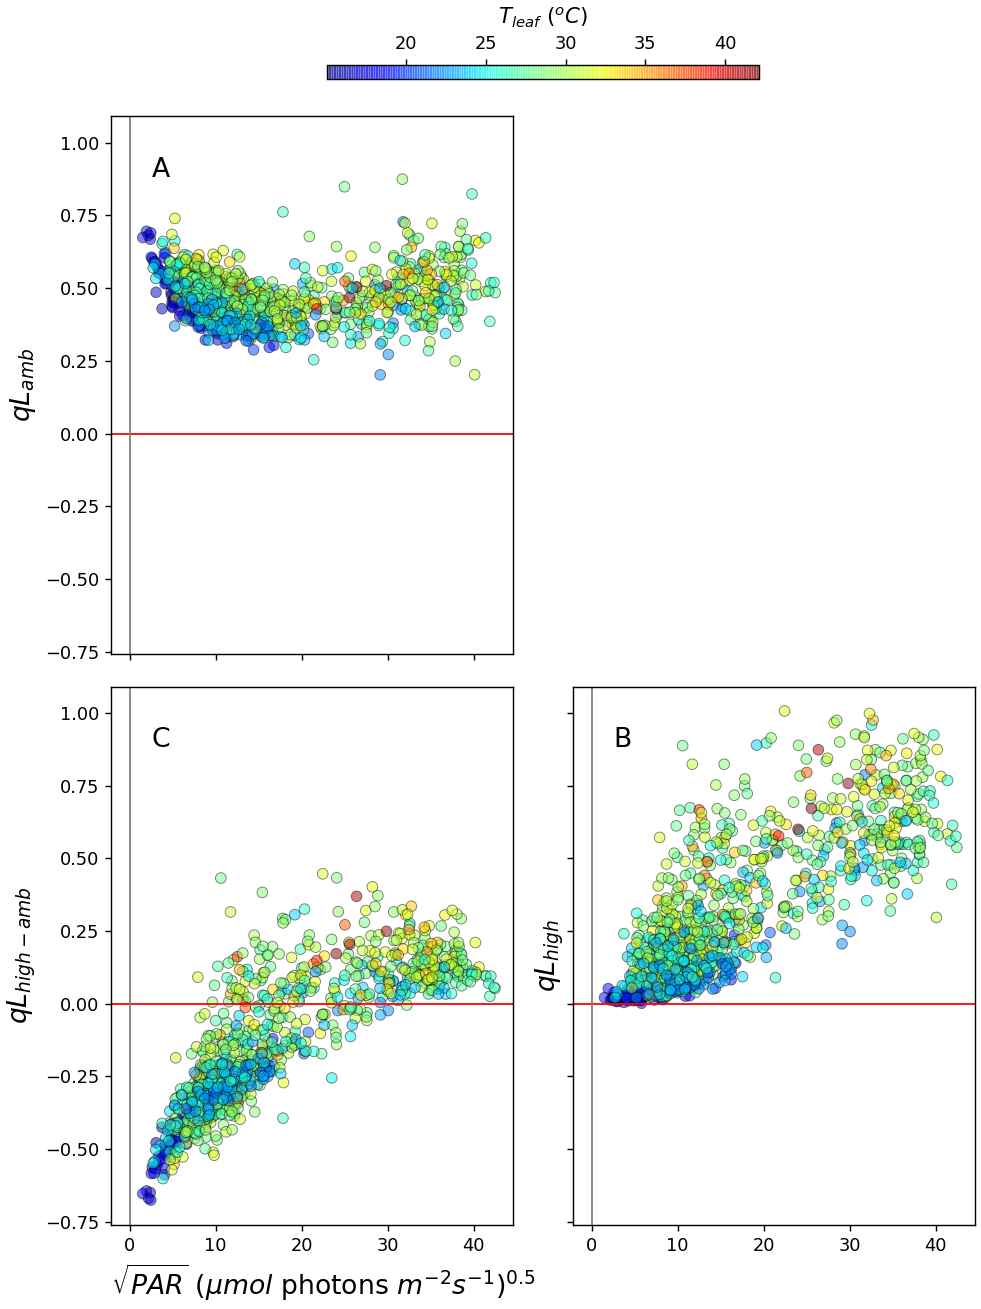

In [26]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'qL (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'qL (high)','Leaf Temperature', [1,1], 'B'],
       ['Light Intensity (PAR)', 'qL (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(2,2, sharex=True, sharey = True, figsize = [6,8], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 15)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)
    
ax[1][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)


#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')


cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')


cbar.ax.set_title(aliases[param[2]] + ' ' + r'$(^oC)$')

#plt.savefig("fig-par-qL-TL.tiff", dpi=600, format="tiff")
plt.show()


<IPython.core.display.Javascript object>


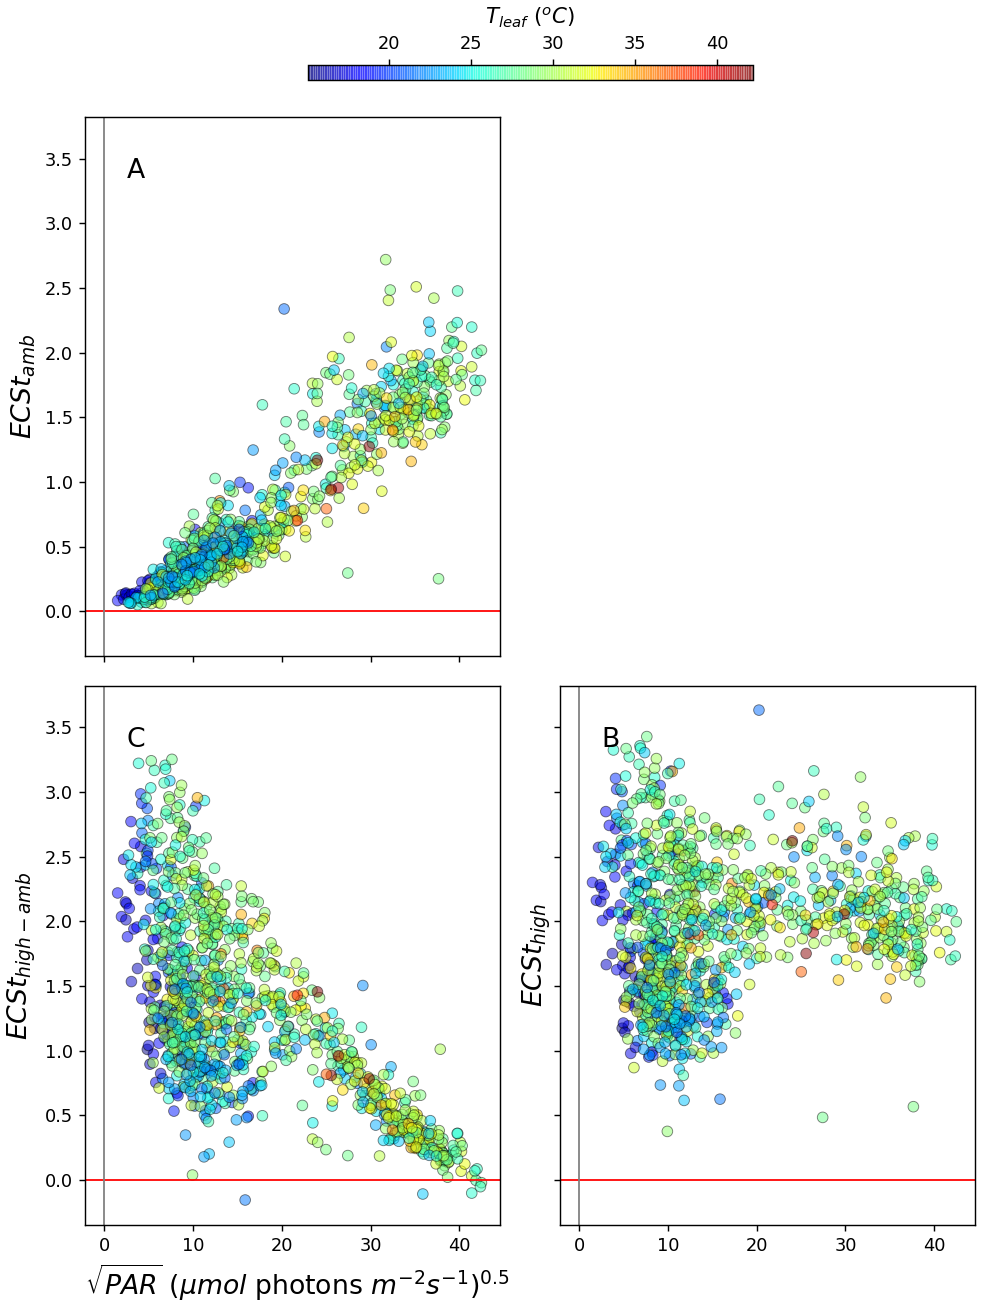

In [27]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'ECSt (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'ECSt (high)','Leaf Temperature', [1,1], 'B'],
       ['Light Intensity (PAR)', 'ECSt (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(2,2, sharex=True, sharey = True, figsize = [6,8], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 15)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)

ax[1][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)


#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')

cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')


cbar.ax.set_title(aliases[param[2]] + ' ' + r'$(^oC)$')


#plt.savefig("fig-par-ecst-TL.tiff", dpi=600, format="tiff")
plt.show()


<IPython.core.display.Javascript object>


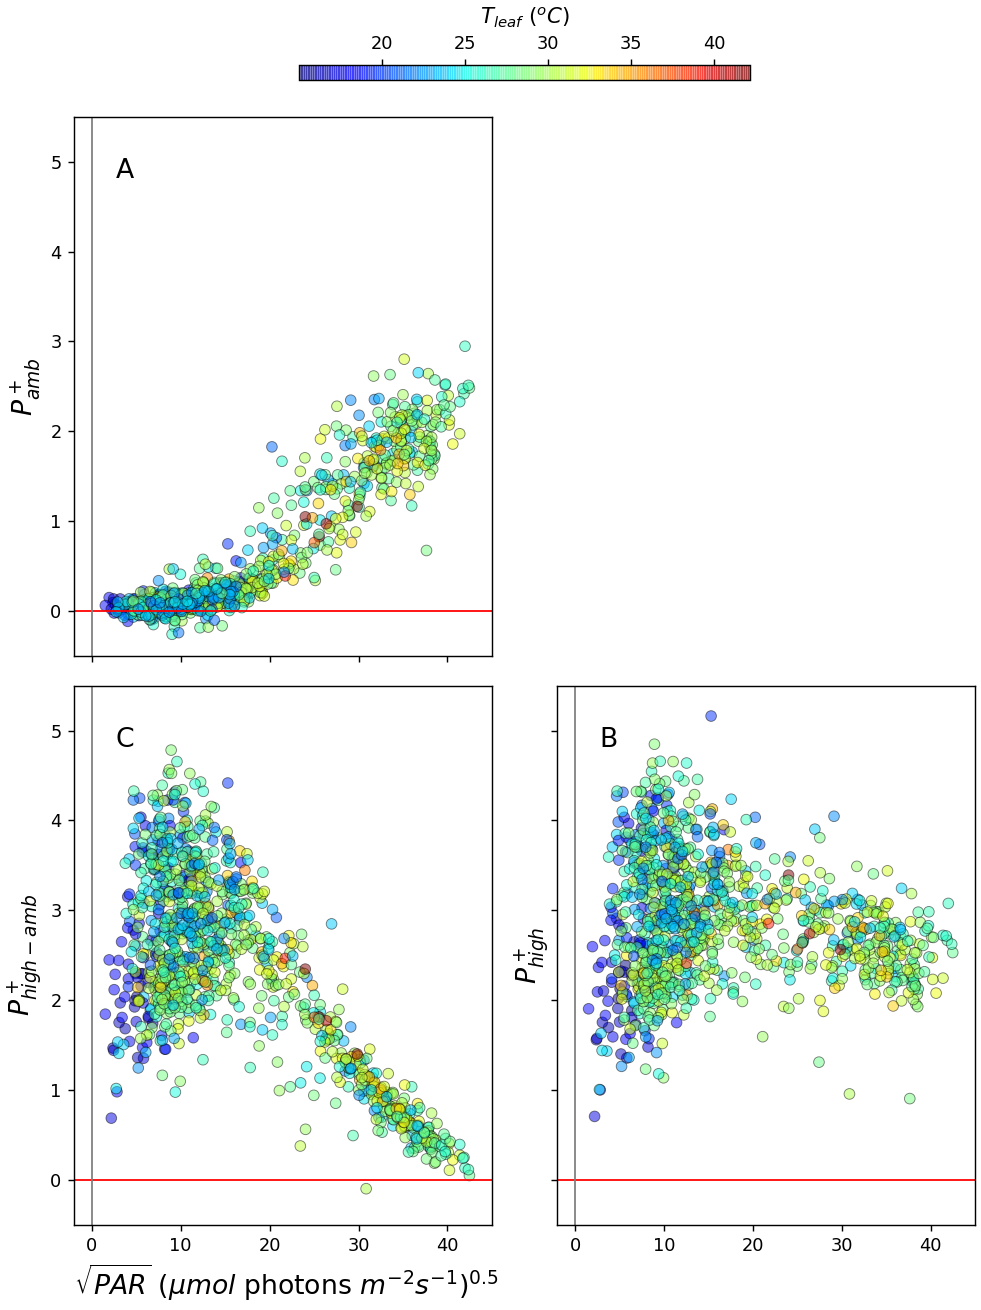

In [28]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'DIRK810 (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'DIRK810 (high)','Leaf Temperature', [1,1], 'B'],
       ['Light Intensity (PAR)', 'DIRK810 (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(2,2, sharex=True, sharey = True, figsize = [6,8], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 15)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)
        

ax[1][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)

    
#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')


cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')


cbar.ax.set_title(aliases[param[2]] + ' ' + r'$(^oC)$')


plt.xlim(xmin=-2,xmax=45)
plt.ylim(ymin=-0.5,ymax=5.5)

#plt.savefig("fig-par-P+-TL.tiff", dpi=600, format="tiff")
plt.show()


In [29]:
data['gH+ (high-ambient)'] = data['gH+ (high)'] - data['gH+ (ambient)']

<IPython.core.display.Javascript object>


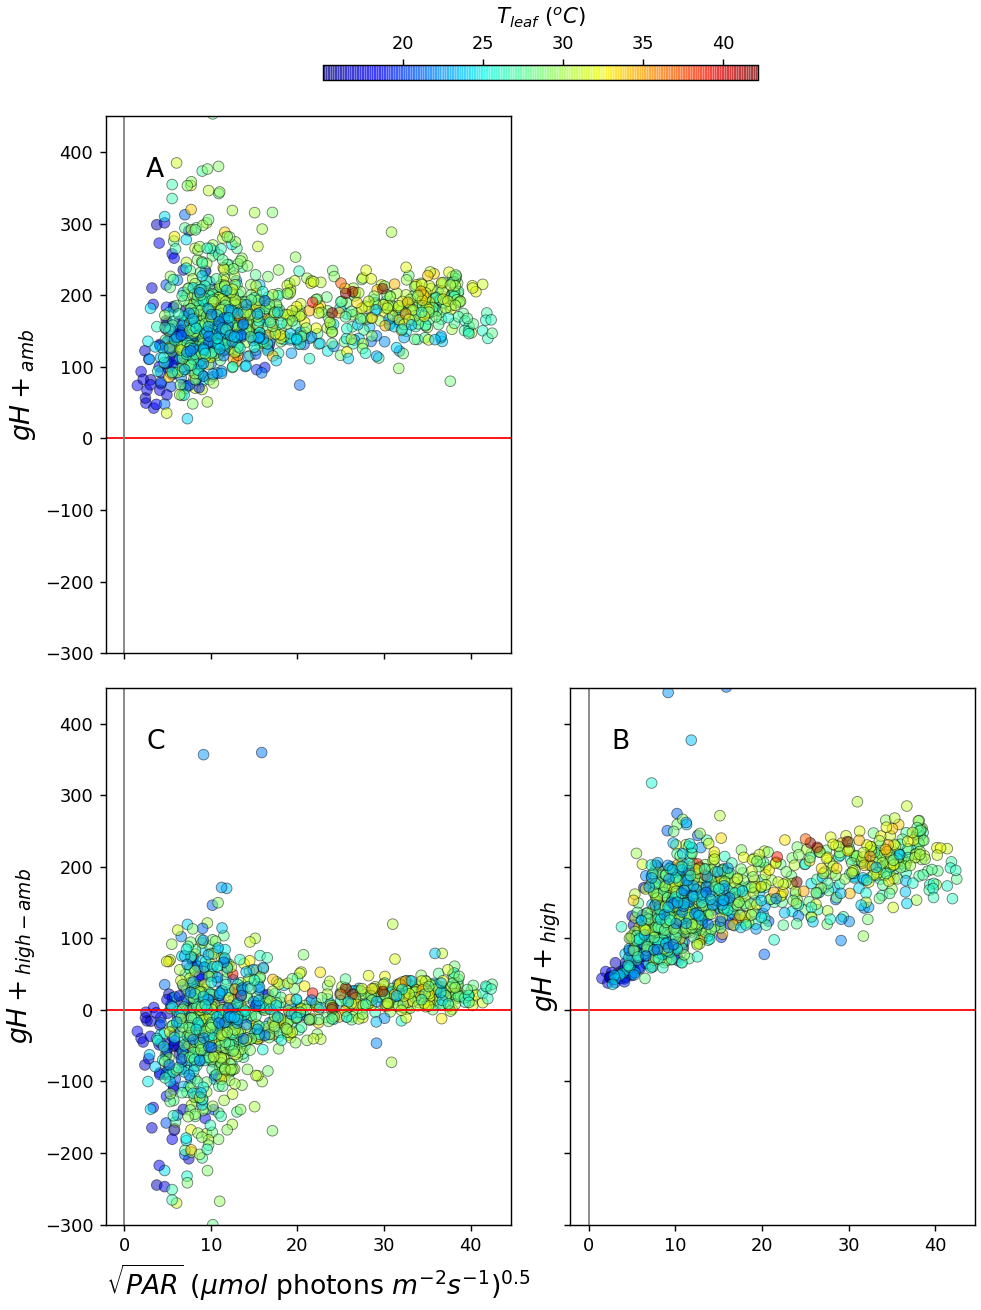

In [30]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'gH+ (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'gH+ (high)','Leaf Temperature', [1,1], 'B'],
       ['Light Intensity (PAR)', 'gH+ (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(2,2, sharex=True, sharey = True, figsize = [6,8], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            1000*sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 15)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)

    ax[i][j].set_ylim(-300,450)

ax[1][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)    


#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')

cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')


cbar.ax.set_title(aliases[param[2]] + ' ' + r'$(^oC)$')


#plt.savefig("fig-par-gH+-TL.tiff", dpi=600, format="tiff")
plt.show()


In [31]:
data['LEF (high-ambient)'] = data['LEF (high)'] - data['LEF (ambient)']

<IPython.core.display.Javascript object>


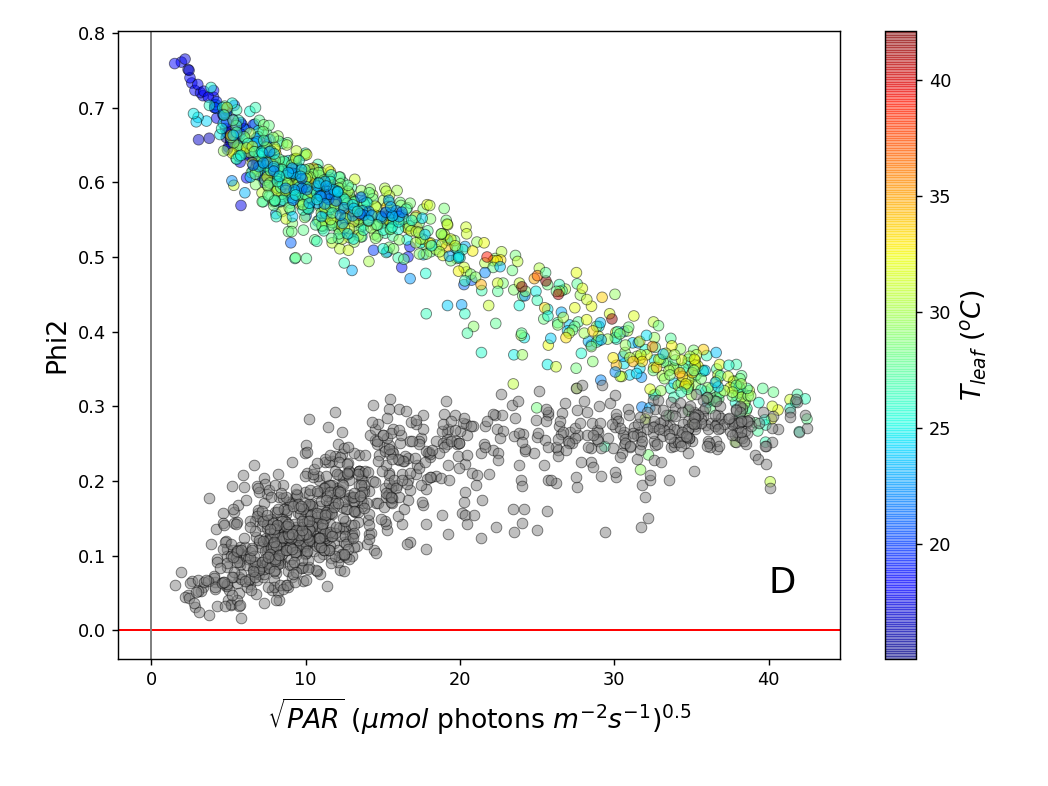

In [32]:
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'Phi2 (ambient)', 'Leaf Temperature'],
       ['Light Intensity (PAR)', 'Phi2 (high)','Leaf Temperature']]

plt.figure()

sel_data = data #[data['qL (high-ambient)']>0]

#for param in params:
param=params[0]
plt.scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
plt.axhline(y=0,linewidth=1, color='red')
plt.axvline(x=0,linewidth=1, color='grey')


cb = plt.colorbar()
cb.set_label(aliases[param[2]] + ' ' + r'$(^oC)$', fontsize = 15)

param=params[1]
plt.scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            color = 'grey', #=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
plt.axhline(y=0,linewidth=1, color='red')
plt.axvline(x=0,linewidth=1, color='grey')

plt.text(40,.05,'D', fontsize=20)

plt.xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, fontsize = 15)

plt.ylabel('Phi2', fontsize = 15)


plt.tight_layout()

#plt.savefig("fig-par-phi2-TL.tiff", dpi=600, format="tiff")
plt.show()

<IPython.core.display.Javascript object>


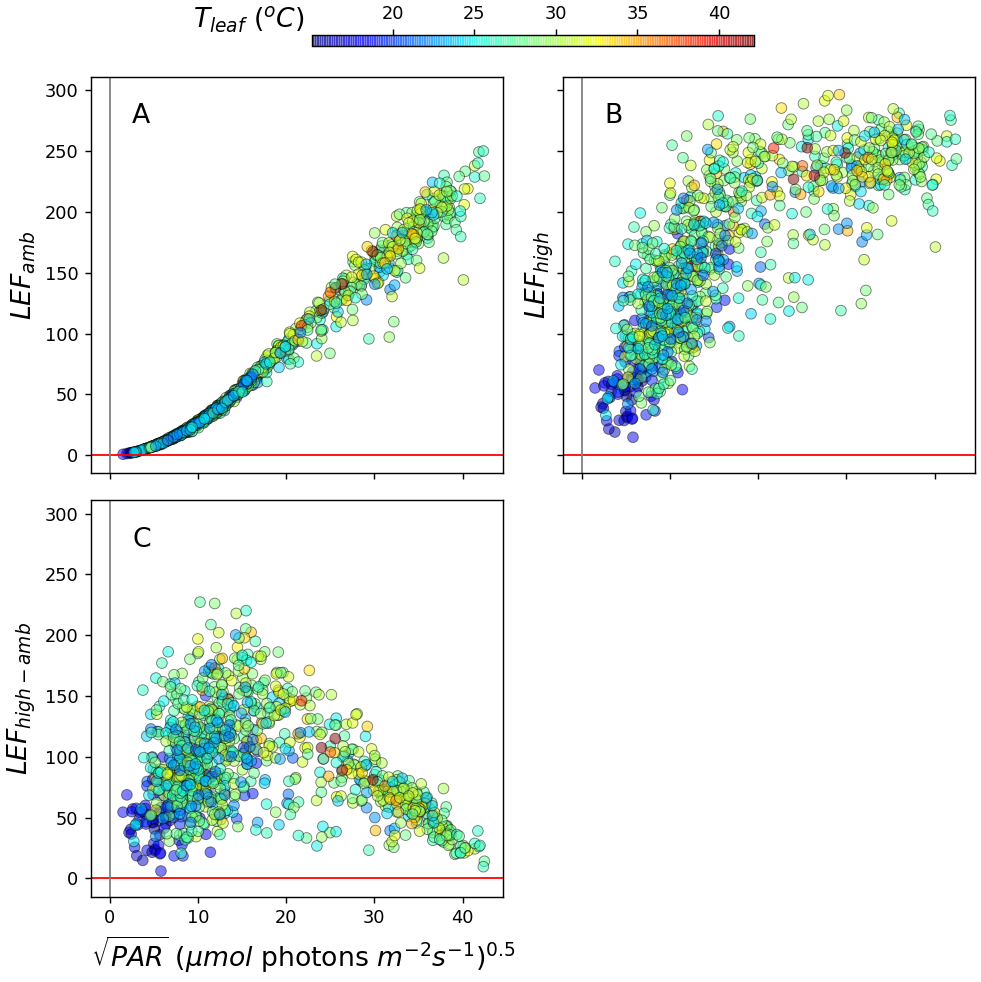

In [33]:
from matplotlib.cm import ScalarMappable
fontsize=15
alpha=0.5

params=[['Light Intensity (PAR)', 'LEF (ambient)', 'Leaf Temperature', [0,0], 'A'],
       ['Light Intensity (PAR)', 'LEF (high)','Leaf Temperature', [0,1], 'B'],
       ['Light Intensity (PAR)', 'LEF (high-ambient)', 'Leaf Temperature', [1,0], 'C']]


fig, ax = plt.subplots(2,2, sharex=True, sharey = True, figsize = [6,6], constrained_layout=True)

sel_data = data #[data['qL (high-ambient)']>0]

list_of_subplots_with_data = []
for index, param in enumerate(params):

    i = param[3][0]
    j = param[3][1]
    
    list_of_subplots_with_data.append([i,j])
    
    grph = ax[i][j].scatter(np.sqrt(sel_data[param[0]]), #x val
            sel_data[param[1]],
            c=sel_data[param[2]],
            edgecolor='black',
            linewidth=.5,
            cmap=cm.jet,
            alpha=alpha,
            label=param[1]) 
    ax[i][j].axhline(y=0,linewidth=1, color='red')
    ax[i][j].axvline(x=0,linewidth=1, color='grey')
    ax[i][j].text(.1,.9,param[4], 
               horizontalalignment='left',
               verticalalignment='center',
               transform=ax[i][j].transAxes, fontsize = 15)
    ax[i][j].set_ylabel(aliases[param[1]], fontsize = 15)
    

ax[1][0].set_xlabel(r'$\sqrt{PAR}$' + ' ' + sqrt_par_unit, loc='left', fontsize = 15)    
    
    
#turn off all subplot axes with no data
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if [i,j] not in list_of_subplots_with_data:
            ax[i][j].axis('off')

cbar = fig.colorbar(grph, ax=ax[:][:], shrink=.5, location='top')

cbar.ax.set_ylabel(aliases[param[2]] + ' ' + r'$(^oC)$', rotation=0, loc='top', fontsize = 15)


#plt.savefig("fig-par-lef-TL.tiff", dpi=600, format="tiff")

plt.show()


<IPython.core.display.Javascript object>


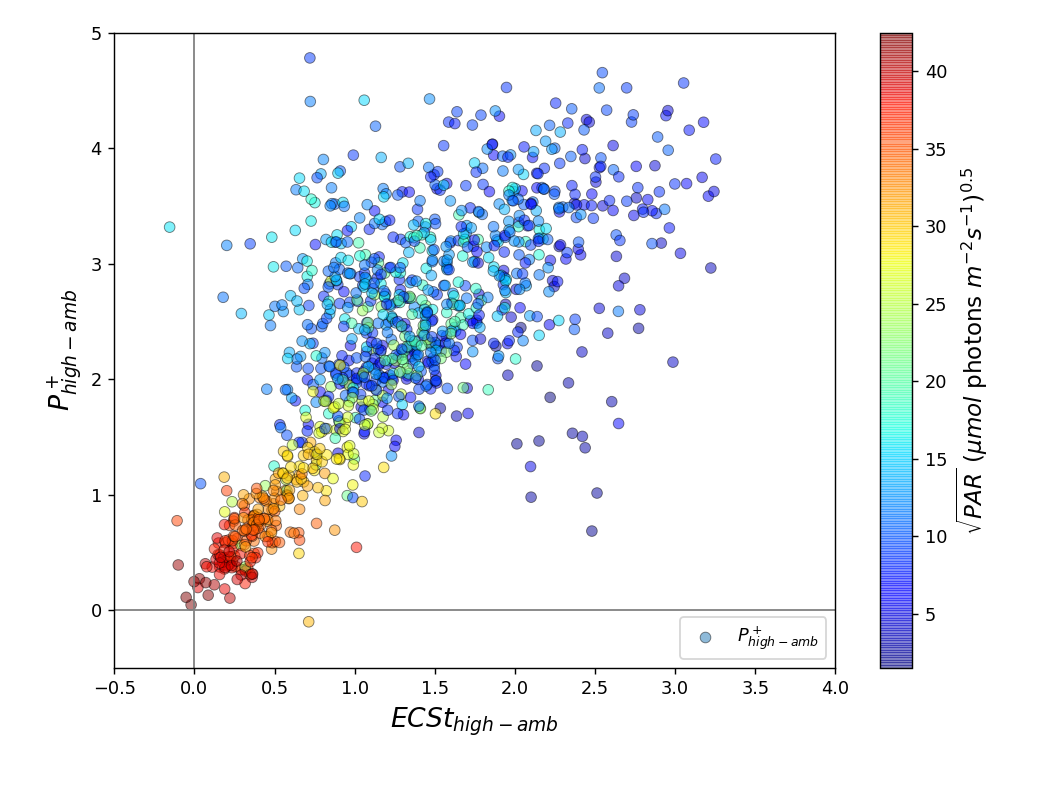

In [34]:
fontsize=15
alpha=0.5

params=[['ECSt (high-ambient)', 'DIRK810 (high-ambient)', 'Light Intensity (PAR)']]

plt.figure()

for param in params:
    plt.scatter(data[param[0]], #x val
                data[param[1]], 

                c=np.sqrt(data[param[2]]),
                edgecolor='black',
                linewidth=.5,
                cmap=cm.jet,
                alpha=alpha,
                label=aliases[param[1]])
    plt.axhline(y=0,linewidth=1, color='grey')



    plt.axvline(x=0,linewidth=1, color='grey')

    data=data[~np.isnan(data[param[1]])]
    regress  = stats.linregress(data[param[0]],data[param[1]])
    

plt.xlim(xmin=-0.5,xmax=4)
plt.ylim(ymin=-0.5,ymax=5)

cb = plt.colorbar()
plt.xlabel(aliases[param[0]], fontsize = 15)
plt.ylabel(aliases[param[1]], fontsize = 15)

plt.legend()
cb.set_label(r'$\sqrt{PAR}$' + ' ' +  r'($\mu mol$ photons $m^{-2} s^{-1})^{0.5}$', fontsize = 13)
plt.tight_layout()
#plt.savefig("fig-ECSt-P+-PAR.tiff", dpi=600, format="tiff")

plt.show()

<IPython.core.display.Javascript object>


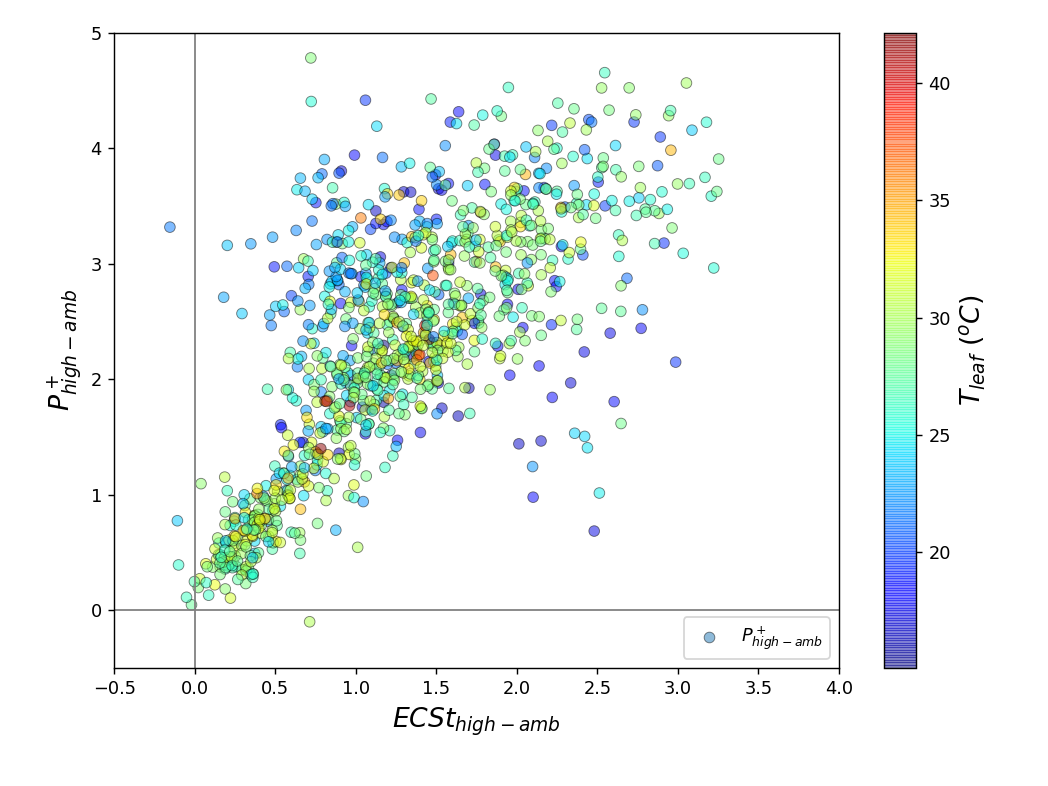

In [35]:
fontsize=15
alpha=0.5

params=[['ECSt (high-ambient)', 'DIRK810 (high-ambient)', 'Leaf Temperature']]

plt.figure()

for param in params:
    plt.scatter(data[param[0]], #x val
                data[param[1]], 
                c=data[param[2]],
                edgecolor='black',
                linewidth=.5,
                cmap=cm.jet,
                alpha=alpha,
                label=aliases[param[1]]) 
    plt.axhline(y=0,linewidth=1, color='grey')



    plt.axvline(x=0,linewidth=1, color='grey')

    data=data[~np.isnan(data[param[1]])]
    regress  = stats.linregress(data[param[0]],data[param[1]])
    

plt.xlim(xmin=-0.5,xmax=4)
plt.ylim(ymin=-0.5,ymax=5)

cb = plt.colorbar()
plt.xlabel(aliases[param[0]], fontsize = 15)
plt.ylabel(aliases[param[1]], fontsize = 15)

plt.legend()
cb.set_label(aliases[param[2]] + ' ' + r'$(^oC)$', fontsize = 15)
plt.tight_layout()

#plt.savefig("fig-ECSt-P+-TL.tiff", dpi=600, format="tiff")

plt.show()

In [36]:
data['qL (high-ambient)'] = data['qL (high)'] - data['qL (ambient)']

<IPython.core.display.Javascript object>


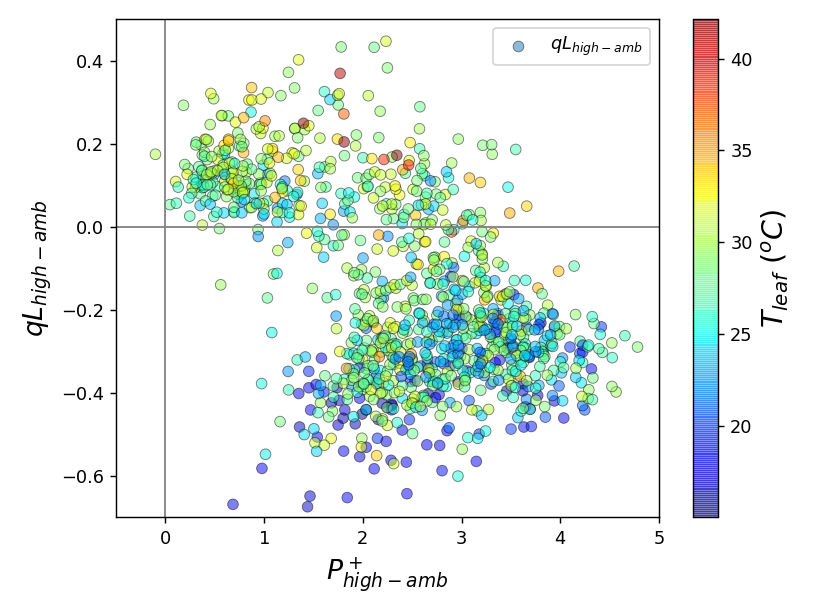

In [37]:
fontsize=15
alpha=0.5

params=[['DIRK810 (high-ambient)', 'qL (high-ambient)', 'Leaf Temperature']]

fig = plt.figure()

for param in params:
    plt.scatter(data[param[0]], #x val
                data[param[1]], 
                c=data[param[2]],
                edgecolor='black',
                linewidth=.5,
                cmap=cm.jet,
                alpha=alpha,
                label=aliases[param[1]]) 
    plt.axhline(y=0,linewidth=1, color='grey')



    plt.axvline(x=0,linewidth=1, color='grey')

    data=data[~np.isnan(data[param[1]])]
    regress  = stats.linregress(data[param[0]],data[param[1]])
    

plt.xlim(xmin=-0.5,xmax=5)
plt.ylim(ymin=-0.7,ymax=0.5)

cb = plt.colorbar()
plt.xlabel(aliases[param[0]], fontsize = 15)
plt.ylabel(aliases[param[1]], fontsize = 15)

plt.legend()
cb.set_label(aliases[param[2]] + ' ' + r'$(^oC)$', fontsize = 16) 
plt.tight_layout()

#plt.savefig("fig-P+-qL-TL.tiff", dpi=600, format="tiff")

plt.show()

In [38]:
model_2 = data[data['qL (high-ambient)']>0.1]
model_3 = data[data['qL (high-ambient)']<-0.1]


<IPython.core.display.Javascript object>


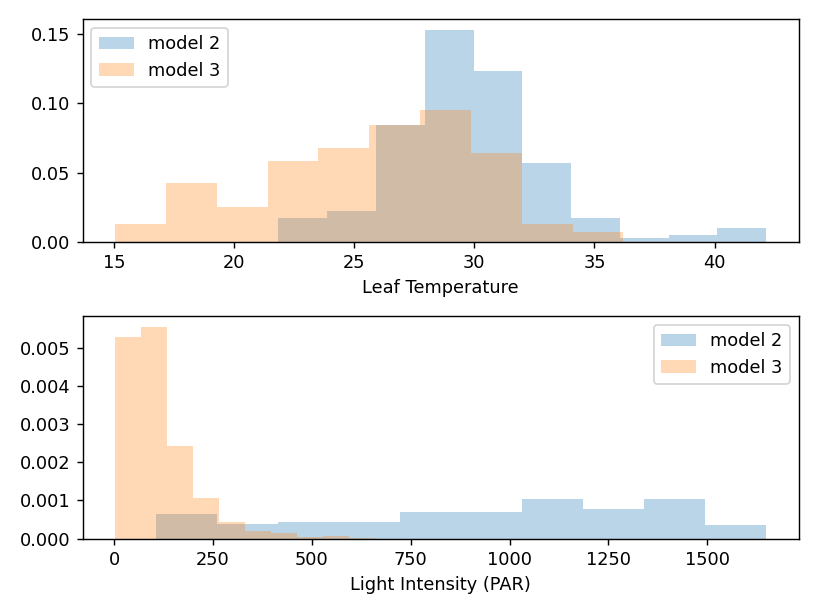

Ttest_indResult(statistic=11.895085043860236, pvalue=2.7340233487697388e-30)
Ttest_indResult(statistic=46.951230325680946, pvalue=2.6071471782946307e-238)


In [39]:
fig, ax = plt.subplots(2)
ax[0].hist(model_2['Leaf Temperature'], alpha=0.3, label = 'model 2', density = True, histtype = 'stepfilled', bins = 10)
ax[0].hist(model_3['Leaf Temperature'], alpha=0.3, label = 'model 3', density = True, histtype = 'stepfilled', bins = 10)
ax[0].legend()
ax[0].set_xlabel('Leaf Temperature')
print(stats.ttest_ind(model_2['Leaf Temperature'], model_3['Leaf Temperature']))

ax[1].hist(model_2['Light Intensity (PAR)'], alpha=0.3, label = 'model 2', density = True, histtype = 'stepfilled', bins = 10)
ax[1].hist(model_3['Light Intensity (PAR)'], alpha=0.3, label = 'model 3', density = True, histtype = 'stepfilled', bins = 10)
ax[1].legend()
ax[1].set_xlabel('Light Intensity (PAR)')
print(stats.ttest_ind(model_2['Light Intensity (PAR)'], model_3['Light Intensity (PAR)']))

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


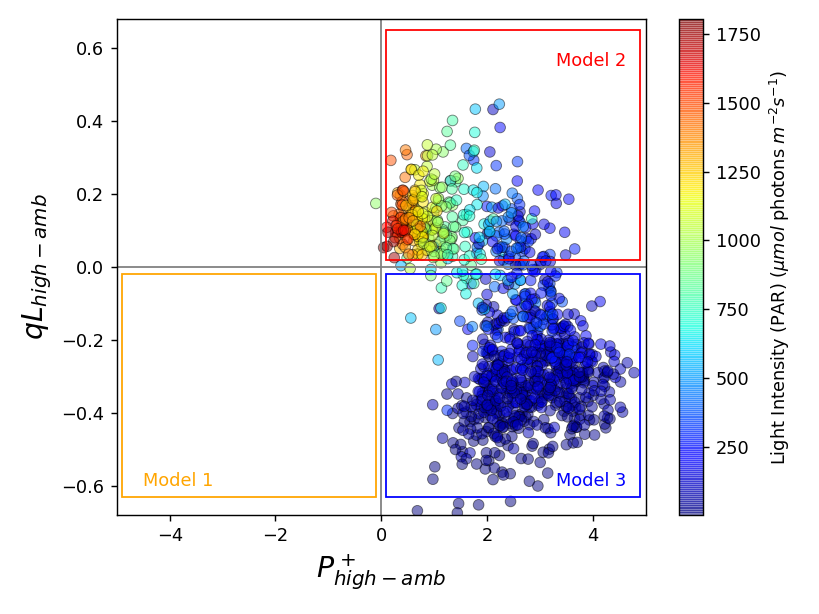

In [40]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

fontsize=15
alpha=0.5

params=[['DIRK810 (high-ambient)', 'qL (high-ambient)', 'Light Intensity (PAR)']]

fig, ax = plt.subplots()

for param in params:
    grph = ax.scatter(data[param[0]], #x val
                data[param[1]], 
                c=data[param[2]],
                edgecolor='black',
                linewidth=.5,
                cmap=cm.jet,
                alpha=alpha,
                label=param[1]) 
    ax.axhline(y=0,linewidth=1, color='grey')



    ax.axvline(x=0,linewidth=1, color='grey')

    data=data[~np.isnan(data[param[1]])]
    regress  = stats.linregress(data[param[0]],data[param[1]])
    

ax.set_xlim(xmin=-5,xmax=5)
ax.set_ylim(ymin=-0.68,ymax=0.68)


cb = fig.colorbar(grph, ax=ax)


ax.set_xlabel(aliases[param[0]], fontsize = 16)
ax.set_ylabel(aliases[param[1]], fontsize = 16)


cb.set_label(param[2] + ' ' +  r'($\mu mol$ photons $m^{-2} s^{-1})$')

# Create a Rectangle patch
rect = patches.Rectangle((0.1,0.02), 4.8, 0.63, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.text(3.3,0.55, "Model 2", color ='r')

# Create a Rectangle patch
rect = patches.Rectangle((0.1,-0.63), 4.8, 0.61, linewidth=1, edgecolor='b', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.text(3.3,-0.6, "Model 3", color ='b')

# Create a Rectangle patch
rect = patches.Rectangle((-4.9,-0.63), 4.8, 0.61, linewidth=1, edgecolor='orange', facecolor='none')


# Add the patch to the Axes
ax.add_patch(rect)
ax.text(-4.5,-0.6, "Model 1", color ='orange')

plt.tight_layout()
#plt.savefig("fig-P+-qL-par-3models.tiff", dpi=600, format="tiff")


plt.show()

<IPython.core.display.Javascript object>


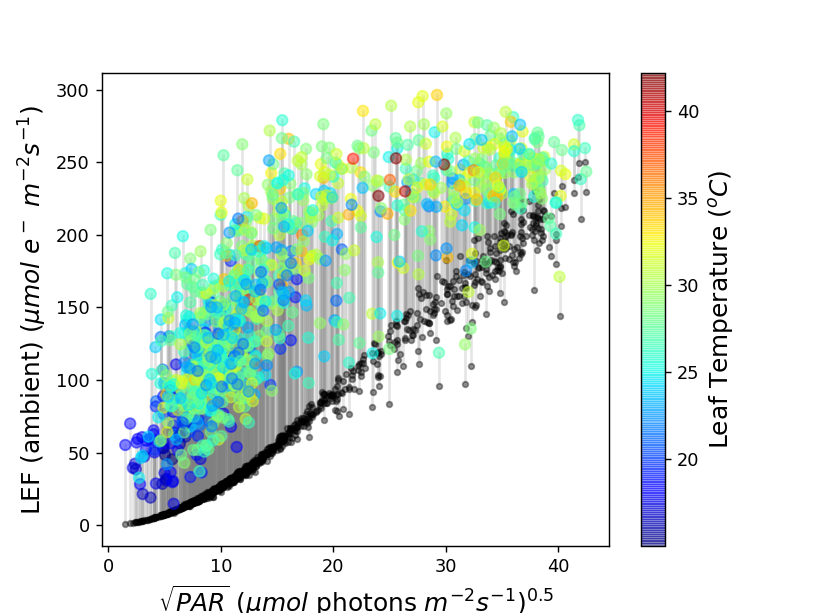

In [41]:
fig, ax = plt.subplots()


x_param = 'Light Intensity (PAR)'

y_param = 'LEF (ambient)'
x = sel_data[x_param]
# x = np.sqrt(x)
y = sel_data[y_param]

c_param = 'Leaf Temperature'
c = sel_data[c_param]

# 


y_param_2 = 'LEF (high)'
y2 = sel_data[y_param_2]

for index in sel_data.index:
#     color = float(sel_data.loc[index, c_param])
    color = 'grey' #color - 10
#     color = color/25
    x = sel_data.loc[index, x_param]
    x = np.sqrt(x)
    ax.plot([x,x], 
             [sel_data.loc[index, y_param], sel_data.loc[index, y_param_2]], 
             color = color,
             alpha=.2, zorder = 1)
#     grph = ax.scatter(x, sel_data.loc[index, y_param_2], color = cm.jet(color), alpha=.5, zorder = 20)
    ax.scatter(x, sel_data.loc[index, y_param], color = "black", alpha = .4, s=10, zorder = 10)

c = sel_data[c_param]
grph = ax.scatter(np.sqrt(sel_data[x_param]), sel_data[y_param_2], c = c, cmap = cm.jet, alpha=.5, zorder = 20)
ax.set_xlabel(r'$\sqrt{' + 'PAR' + '}$' + ' ' + sqrt_par_unit, fontsize = 14) # + x_param + r'$^{-2}$' )
ax.set_ylabel(y_param + ' ' + units[y_param] , fontsize = 14)

cb = fig.colorbar(grph, ax=ax)

cb.set_label(c_param + ' ' + units[c_param], fontsize = 14)

plt.show()